**Imports**


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from google.colab import files
%matplotlib inline

**Collecting Datasets from Google Drive**

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

links = ['https://drive.google.com/open?id=1qtohBYUo811NeQzwOeW74zTLD_zog4sN',
        'https://drive.google.com/open?id=1PXrnVSLRD9sgEb0osZi7HYd9Sj4yqrfc',
        'https://drive.google.com/open?id=15fEZO6-DgaukF9YtufOiQuIioh7jlAFT',
        'https://drive.google.com/open?id=1qtohBYUo811NeQzwOeW74zTLD_zog4sN']
names = ['processed.switzerland.data.csv', 'processed.hungarian.data.csv',
        'processed.cleveland.data.csv', 'processed.va.data.csv']

#download datasets from google drive into data frame
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
                             'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
                             'ca', 'thal','prediction']
dfs = []
for i in range(len(links)):
    link = links[i]
    fluff, id = link.split('=')
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(names[i])  
    dfs.append(pd.read_csv(names[i], header = None))
    dfs[-1].columns = columns
    
#Append all datasets
df = pd.concat((dfs[0], dfs[1], dfs[2], dfs[3]))

In [0]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction
0,63.0,1.0,4.0,140,260,0,1,112,1,3,2,?,?,2
1,44.0,1.0,4.0,130,209,0,1,127,0,0,?,?,?,0
2,60.0,1.0,4.0,132,218,0,1,140,1,1.5,3,?,?,2
3,55.0,1.0,4.0,142,228,0,1,149,1,2.5,1,?,?,1
4,66.0,1.0,3.0,110,213,1,2,99,1,1.3,2,?,?,0
5,66.0,1.0,3.0,120,0,0,1,120,0,-0.5,1,?,?,0
6,65.0,1.0,4.0,150,236,1,1,105,1,0,?,?,?,3
7,60.0,1.0,3.0,180,0,0,1,140,1,1.5,2,?,?,0
8,60.0,1.0,3.0,120,0,?,0,141,1,2,1,?,?,3
9,60.0,1.0,2.0,160,267,1,1,157,0,0.5,2,?,?,1


In [0]:
#removing ? values in data
df['thal'] = df['thal'].replace('?',df['thal'].value_counts().index.tolist()[1])
df['ca'] = df['ca'].replace('?',df['ca'].value_counts().index.tolist()[1])
df['ca'].value_counts()

0.0    867
1.0     65
2.0     38
3.0     20
0        7
Name: ca, dtype: int64

In [0]:
#seperating the prediction from data, converting all types of heart disease into one type
y = df['prediction']
df.drop(['prediction'],axis=1,inplace=True)

print(y.value_counts())
y=y.replace(2,1)
y=y.replace(3,1)
y=y.replace(4,1)


0    454
1    273
3    119
2    118
4     33
Name: prediction, dtype: int64


In [0]:
print(y.value_counts())

1    543
0    454
Name: prediction, dtype: int64


In [0]:
#Removing nan and converting data to integers
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(method='ffill', inplace=True)

In [0]:
#Using Standard Scaler to scale the data
X = df
print(df.info())

def stdscaler(X):
    for col in X.columns:
        X[col] = (X[col] - X[col].mean())/(X[col].std())
    return X 

print(stdscaler(X).head(100))   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 199
Data columns (total 13 columns):
age         997 non-null float64
sex         997 non-null float64
cp          997 non-null float64
trestbps    997 non-null float64
chol        997 non-null float64
fbs         997 non-null float64
restecg     997 non-null float64
thalach     997 non-null float64
exang       997 non-null float64
oldpeak     997 non-null float64
slope       997 non-null float64
ca          997 non-null float64
thal        997 non-null float64
dtypes: float64(13)
memory usage: 109.0 KB
None


In [0]:
#Function to divide dataset into train and test as 20:80
def train_test_split(X, y, ratio):
  X_train = X[:int(ratio*len(y))]
  y_train = y[:int(ratio*len(y))]
  X_test = X[int(ratio*len(y)):]
  y_test = y[int(ratio*len(y)):]
  return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.8)

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [0]:
#activation functions along with derivative functions

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))

def relu(x):
    return [max(i, 0) for i in x]

def relu_derivative(x):
    temp = []
    for i in x:
        if i < 0:
            temp.append(0)
        else:
            temp.append(1)
    return np.array(temp)

def derivativeactivation(inp, activ):
    if (activ=='sigmoid'):
        return sigmoid_derivative(inp)
    elif (activ=='relu'):
        return relu_derivative(inp)
    else:
        return sigmoid_derivative(inp)
    
def activate(inp, activ):
    if (activ=='sigmoid'):
        return sigmoid(inp)
    elif (activ=='relu'):
        return relu(inp)

In [0]:
class NeuralNetwork:
  def __init__(self, dimensions, activations, learning_rate):  #dimensions are of the form of (inputsize,45,...,45,1)
    self.dimensions = dimensions
    self.learning_rate = learning_rate
    self.weightsarray = []
    self.deltasarray = [[] for i in range(len(dimensions)-1)] #calculates the error for backpropogation
    self.biasarray = []
    self.activations = activations #contains activations for all layers (excluding the input layer)
    for i in range(len(dimensions)-1):
      temp = np.random.rand(dimensions[i],dimensions[i+1]) #randomly set weights in the network
      self.weightsarray.append(temp)
    for i in range(len(dimensions)-1):
      temp = np.zeros((dimensions[i+1],)) #set the bias values to 0 for all neurons
      self.biasarray.append(temp)   
    self.biasarray = np.array(self.biasarray)
    self.output     = np.zeros(dimensions[-1]) #set output layer to 0
    self.unactivatedoutput = np.zeros(dimensions[-1]) 
    self.layersarray = [[] for i in range(len(dimensions))] #contains activated output of layers
    self.unactivatedlayersarray = [[] for i in range(len(dimensions))] #contains unactivated output of layers
    self.d_weights = [[] for i in range(len(dimensions)-1)] #contains the value to be added to the weights
    self.d_bias = [[] for i in range(len(dimensions))] #contains the value to be added to the bias
    
        
  def print_fun(self, y):
    '''
    Function to print necessary values in the network
    '''
    print('Weight: {}'.format(self.weightsarray[0].shape,self.weightsarray[1].shape))
    print('Layers: {}'.format(self.layersarray))
    print('Bias: {}'.format(self.biasarray[0].shape))
    print('Output: {}'.format(self.output))
    print('Loss: {}'.format(self.output - y))
        
  def plott(self,X,y,title):
    '''
    Function to plot the loss vs the number of epochs
    '''
    plt.plot(X,y)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(title)
    plt.show()
    
  def forwardprop(self):
    '''
    Function to implement forward propogation
    '''
    for i in range(len(self.dimensions)-1):
        self.unactivatedlayersarray[i+1] = np.add(np.dot(self.layersarray[i], self.weightsarray[i]),self.biasarray[i])
        self.layersarray[i+1] = activate((np.add(np.dot(self.layersarray[i], self.weightsarray[i]),self.biasarray[i])),self.activations[i+1])
    
    self.output = self.layersarray[-1]
    self.unactivatedoutput = self.unactivatedlayersarray[-1]  
    
  def backprop(self, y):
    '''
    Function to implement back propogation
    '''
   
    self.deltasarray[-1] = (y - self.layersarray[-1]) * derivativeactivation(self.unactivatedlayersarray[-1], self.activations[len(self.dimensions)-1])
    for i in range(len(self.dimensions) - 3, -1, -1):
      self.deltasarray[i] = (np.dot(self.weightsarray[i+1], self.deltasarray[i+1]) * derivativeactivation(self.unactivatedlayersarray[i+1], self.activations[i+1]))
    for i in range(len(self.weightsarray)):
      self.d_weights[i] = np.dot(np.reshape(self.layersarray[i],(-1,1)), np.reshape(self.deltasarray[i], (1,-1)))
    self.d_bias = self.deltasarray
    
    #update weights and bias
    self.weightsarray = np.add(self.weightsarray,self.d_weights*self.learning_rate)
    self.biasarray = np.add(self.biasarray,self.d_bias*self.learning_rate)
    
  def train(self, x, y, epochs):
    if x.shape[1] != self.dimensions[0]:
        print(x.shape[1], y.shape[1])
        raise Exception('X dimension should match dimension of first layer')
        return
    error_list = []
    for epoch in range(epochs):
      sum_loss = 0  
      for ix,ex in enumerate(x):
        self.layersarray[0] = ex.T
        self.unactivatedlayersarray[0] = ex.T
        self.forwardprop()
        self.backprop(y[ix])
        sum_loss += ((y[ix] - self.output[0]) ** 2)
      error_list.append(sum_loss)
    return error_list
  
  def test(self, x, y):
    count = 0
    for ix,ex in enumerate(x):
      self.layersarray[0]=ex.T
      self.unactivatedlayersarray[0]=ex.T
      self.forwardprop()
        
      #predicting class based on output of last layer
      if (self.output[0]<0.5):
        pred=0
      else:
        pred=1
      if ((y[ix]==pred)):
        count+=1
    return (count/y.shape[0])


In [0]:
#print((X_train))
print('Layers: 45, 2, 1')
nn = NeuralNetwork((13,45,2,1),{1:'sigmoid', 2:'sigmoid', 3:'sigmoid'},1)
nn.train(X_train, y_train ,100)
print("Accuracy is ", nn.test(X_test, y_test))

Layers: 45, 2, 1
Accuracy is  0.92


Finished 100 epochs
Finished 200 epochs
Finished 300 epochs
Finished 400 epochs
Finished 500 epochs
Finished 600 epochs
Finished 700 epochs
Finished 800 epochs
Finished 900 epochs
    Accuracy       Loss  Number of Epochs
0      0.850  66.714261                50
1      0.925  38.435678               100
2      0.950  33.239304               150
3      0.960  24.444357               200
4      0.960  24.310120               250
5      0.960  16.577118               300
6      0.960  15.501060               350
7      0.960  15.490426               400
8      0.960  15.484671               450
9      0.960  14.550139               500
10     0.960  14.548290               550
11     0.960  14.547187               600
12     0.960  14.546430               650
13     0.960  14.545873               700
14     0.960  14.545443               750
15     0.960  14.545102               800
16     0.960  14.544823               850
17     0.960  14.544592               900
18     0.960  14.54439

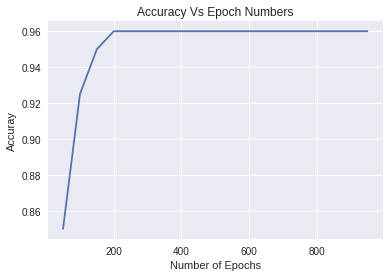

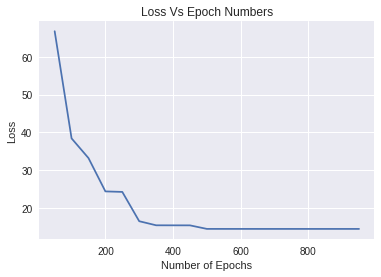

In [0]:
#Plot Accuracy, Loss Vs Number of Epochs
loss=[]
accuracy=[]

nn = NeuralNetwork((13,45,2,1),{1:'sigmoid', 2:'sigmoid', 3:'sigmoid'}, 1)
for i in range(50,1000,50):    
    
    l = nn.train(X_train,y_train,i)[-1]
    loss.append(l)
    accuracy.append(nn.test(X_test, y_test))
    if i%100 == 0:
        print('=========================================\nFinished {} epochs'.format(i))

x = [i for i in range(50,1000,50)]  
data_final = pd.DataFrame({'Number of Epochs': x, 'Accuracy': accuracy, 'Loss': loss})
print(data_final)
plt.plot(x, accuracy)
plt.title('Accuracy Vs Epoch Numbers')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuray')
plt.show()
plt.plot(x, loss)
plt.title('Loss Vs Epoch Numbers')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

In [0]:
#Running the sklearn classifier
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes = (45,2), max_iter = 500)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.95